# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
single_Datafr_df=pd.merge(mouse_metadata,study_results, how = 'right')

# Display the data table for preview
single_Datafr_df=single_Datafr_df[['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug Regimen','Sex','Age_months','Weight (g)']]
single_Datafr_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
single_Datafr_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate = single_Datafr_df.loc[single_Datafr_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
mice_duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicate_opt = single_Datafr_df.loc[single_Datafr_df["Mouse ID"] == "g989", :]
mice_duplicate_opt

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#data_clean = single_Datafr_df.drop_duplicates(subset=['Mouse ID','Timepoint','Tumor Volume (mm3)',
                                                      ##'Metastatic Sites','Drug Regimen','Sex',
                                                      #'Age_months','Weight (g)'],keep = 'first')
data_clean = single_Datafr_df[single_Datafr_df['Mouse ID'].isin(mice_duplicate)==False]
data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
data_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_drug_regimen=data_clean.groupby('Drug Regimen').mean(numeric_only=True)["Tumor Volume (mm3)"]
median_drug_regimen=data_clean.groupby('Drug Regimen').median(numeric_only=True)["Tumor Volume (mm3)"]
var_drug_regimen=data_clean.groupby('Drug Regimen').var(numeric_only=True)["Tumor Volume (mm3)"]
std_drug_regimen=data_clean.groupby('Drug Regimen').std(numeric_only=True)["Tumor Volume (mm3)"]
sem_drug_regimen=data_clean.groupby('Drug Regimen').sem(numeric_only=True)["Tumor Volume (mm3)"]
# Assemble the resulting series into a single summary DataFrame.
summary_std=pd.DataFrame({"Mean Tumor Volume":mean_drug_regimen,
                          "Median Tumor Volume":median_drug_regimen,
                          "Tumor Volume Variance":var_drug_regimen,
                          "Tumor Volume Std. Dev.":std_drug_regimen,
                          "Tumor Volume Std. Err.":sem_drug_regimen})
summary_std

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Agg_opt = data_clean.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
Agg_opt

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

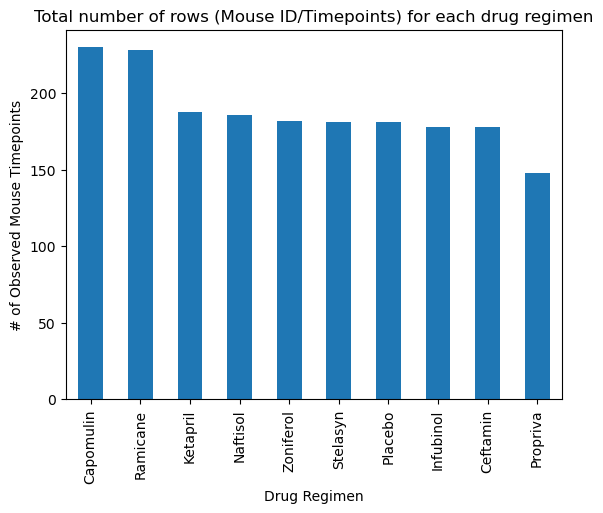

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Num_micePerTreat = data_clean["Drug Regimen"].value_counts()
Bar_Chart_a=Num_micePerTreat.plot.bar(color = 'tab:blue')
# Labels and tile of garph
#X-label Drug Regimen
plt.xlabel("Drug Regimen")
#Y-label # of Observed Mouse Timepoints
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total number of rows (Mouse ID/Timepoints) for each drug regimen")
plt.show()

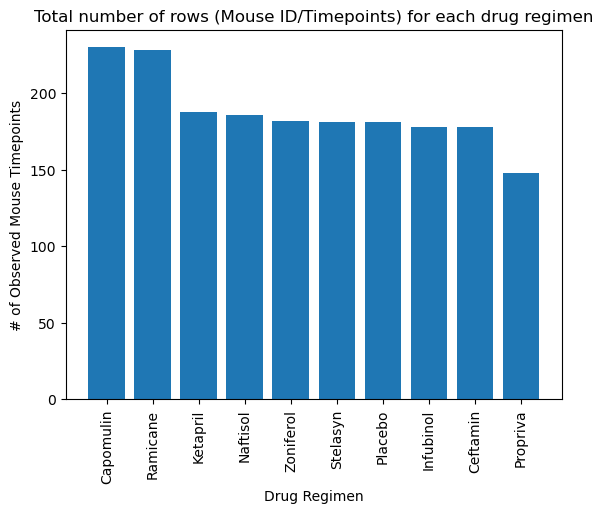

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
MouseID_x = Num_micePerTreat.index.values
Timepoints_y= Num_micePerTreat.values
plt.bar(MouseID_x,Timepoints_y)
plt.xticks(rotation ="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total number of rows (Mouse ID/Timepoints) for each drug regimen")
plt.show()

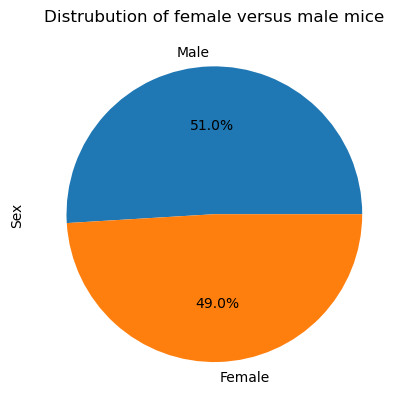

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender_panda = data_clean["Sex"].value_counts()
mice_gender_panda.plot.pie(autopct= "%1.1f%%")
plt.ylabel('Sex')
plt.title("Distrubution of female versus male mice")
plt.show()

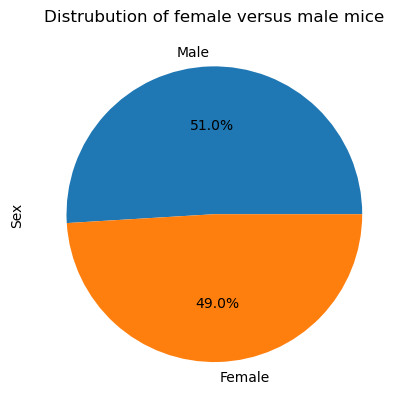

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender_pyplot = data_clean["Sex"].value_counts()
mice_gender_pyplot
category = ['Male','Female']
count = [958,922]
plt.pie(count,labels = category,autopct= "%1.1f%%")
plt.ylabel('Sex')
plt.title("Distrubution of female versus male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Greatest_TP = data_clean.groupby(["Mouse ID"])['Timepoint'].max()
Reset_Greatest_TP=Greatest_TP.reset_index()
Reset_Greatest_TP

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [14]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#Tumor_dataFrm = Reset_Greatest_TP[['Mouse ID','Timepoint']].\
    #merge(data_clean,on=['Mouse ID','Timepoint'],how="left")
Tumor_dataFrm = Reset_Greatest_TP.merge(data_clean,on=['Mouse ID','Timepoint'],how="left")
Tumor_dataFrm

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorVol_list=[]
for drug in drug_list:
    timeP_df = Tumor_dataFrm.loc[Tumor_dataFrm['Drug Regimen']== drug]
    final_tumor_vol = Tumor_dataFrm.loc[Tumor_dataFrm["Drug Regimen"] == drug,'Tumor Volume (mm3)']
    tumorVol_list.append(final_tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    low_quar = quartiles[0.25]
    upper_quar = quartiles[0.75]
    iqr = upper_quar-low_quar
    print(f'IQR for {drug}: {iqr}')
    
    lower_bound = low_quar - (1.5*iqr)
    upper_bound = upper_quar + (1.5*iqr)
    
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    count_outlier = (final_tumor_vol.loc[(final_tumor_vol>= upper_bound) | 
                                        (final_tumor_vol<= lower_bound)]).count()
    print(f'Number of {drug} outliers: {count_outlier}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


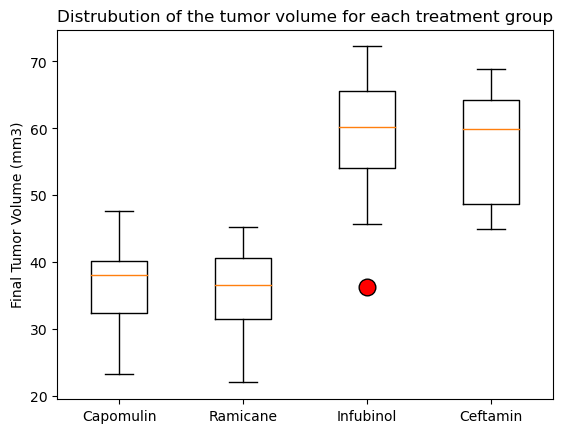

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=12, markeredgecolor='black')
plt.boxplot(tumorVol_list, flierprops=flierprops)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.title("Distrubution of the tumor volume for each treatment group")
plt.show()

## Line and Scatter Plots

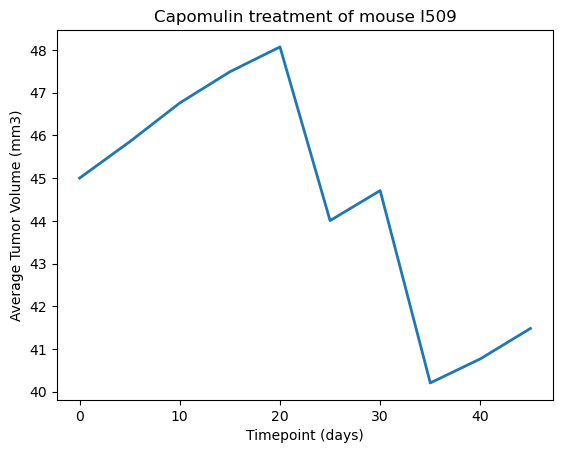

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = data_clean.loc[data_clean["Drug Regimen"] == "Capomulin",:]

forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
plt.plot(x_axis, tumsiz,linewidth=2,color="tab:blue", label="Fahreneit")
plt.xlabel("Timepoint (days)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse I509")
plt.show()

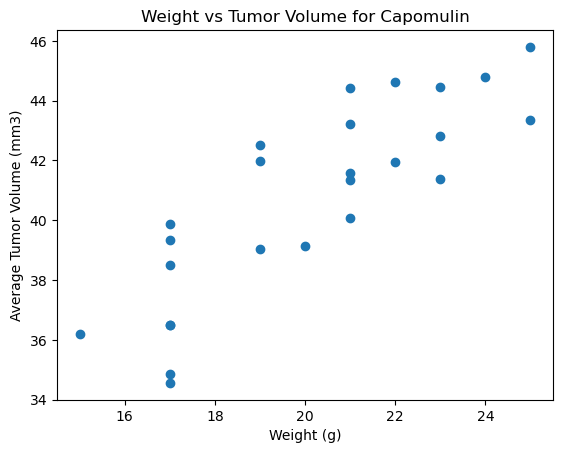

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capmomul_vol =Capomulin_df.groupby(['Mouse ID']).mean(numeric_only=True)
marker_size=15
plt.scatter(avg_capmomul_vol['Weight (g)'],avg_capmomul_vol['Tumor Volume (mm3)'], color="tab:blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


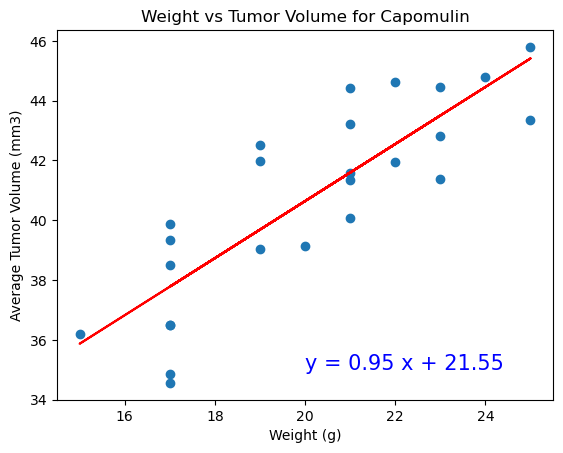

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_co = st.pearsonr(avg_capmomul_vol['Weight (g)'],avg_capmomul_vol['Tumor Volume (mm3)'])
#Print the correaltion anser
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_co[0],2)}")
#Calculate linear regression
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(avg_capmomul_vol["Weight (g)"],avg_capmomul_vol["Tumor Volume (mm3)"])
regress_values=avg_capmomul_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(avg_capmomul_vol["Weight (g)"],avg_capmomul_vol["Tumor Volume (mm3)"],color='tab:blue')
plt.plot(avg_capmomul_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,35), fontsize=15, color = "blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()